In [ ]:
import numpy as np
import random

# Define the distance matrix
dist_matrix= np.array([[np.inf,61.72,164.05,80.48,146.04,205.22,161.45,94.95,81.18,91.27],
          [61.726,np.inf,102.87,141.03,109.48,263.11,199.60,155.90,88.96,69.49],
          [164.05,102.87,np.inf,243.89,130.10,365.22,290.06,256.15,171.47,116.29],
          [80.48,141.03,243.89,np.inf,200.61,126.10,119.19,42.63,115.27,163.99],
          [146.04,109.48,130.10,200.61,np.inf,295.86,191.43,232.34,87.52,173.83],
          [205.22,263.11,365.22,126.10,295.86,np.inf,123.41,138.28,210.17,289.83],
          [161.45,199.60,290.06,119.19,191.43,123.41,np.inf,159.45,118.73,251.75],
          [94.95,155.50,256.15,42.63,232.34,138.28,159.45,np.inf,150.99,160.31],
          [82.18,88.96,171.47,115.27,87.52,210.17,118.73,150.99,np.inf,153.50],
          [91.27,69.49,116.29,163.99,173.83,289.93,251.75,160.31,153.50,np.inf]])

# Define the parameters for the genetic algorithm
POPULATION_SIZE = 10
NUM_GENERATIONS = 100
MUTATION_RATE = 0.1

# Define the fitness function
def fitness(route, dist_matrix): # This function calculates the fitness value of a given route (a list of city indices). It takes two arguments: route, which is the route to be evaluated, and dist_matrix, which is a matrix containing the distances between all pairs of cities.
    cost = 0 #  first initializes a cost variable to 0
    for i in range(len(route)-1): #iterates through the indices of route
        cost += dist_matrix[route[i], route[i+1]] #adding the distance between each pair of adjacent cities to cost. 
    return 1/cost #Finally, it returns the reciprocal of cost.

# Define the initial population
def create_population(size, num_cities): #it takes two arguments: size, which is the number of routes to be generated, and num_cities, which is the total number of cities in the problem.
    population = [] # initializing empty array 
    for i in range(size):
        population.append(random.sample(range(num_cities), num_cities)) #This creates an initial population of size routes, each consisting of a random permutation of the integers from 0 to num_cities - 1.
    return population #Finally, it returns the population 

# Define the selection function
def selection(population, dist_matrix): #This function performs selection of the best individual from a population based on their fitness values. 
                                        #It takes two arguments: population, which is the current population of routes, and dist_matrix, which is a matrix containing the distances between all pairs of cities.
    fitnesses = [fitness(route, dist_matrix) for route in population] # calculates the fitness value of each route in the population using the fitness function.
    return population[np.argmax(fitnesses)] #returns the route with the highest fitness value.

# Define the crossover function
def crossover(parent1, parent2): # This function performs crossover of two parent routes to generate a child route.
                                 #It takes two arguments: parent1 and parent2, which are the parent routes to be crossed over.
    child = [-1] * len(parent1)  # The function first initializes a child list with -1 values.
    geneA = int(random.random() * len(parent1)) #randomly selects two crossover points (geneA and geneB). 
    geneB = int(random.random() * len(parent1))
    startGene = min(geneA, geneB) 
    endGene = max(geneA, geneB)
    for i in range(startGene, endGene):
        child[i] = parent1[i] # It then copies the values of the parent1 route between the two crossover points to the corresponding positions in the child route
    for i in range(len(parent2)): #It iterates through the parent2 route 
        if parent2[i] not in child:
            for j in range(len(child)):
                if child[j] == -1:
                    child[j] = parent2[i] #and inserts any remaining cities into the child route in the order they appear, skipping any cities that are already in the child route.
                    break
    return child

# Define the mutation function
def mutation(route): #  
                     #It takes one argument: route, which is the route to be mutated.
    for i in range(len(route)): # iterates through the indices of route and randomly selects a second index
        if random.random() < MUTATION_RATE: # checking the condition
            j = int(random.random() * len(route))
            route[i], route[j] = route[j], route[i] # if the condition satisfy we are exchanging the rows with coloumns and columns with rows 
    return route # finally returning thr route.

# Define the main genetic algorithm function
def genetic_algorithm(dist_matrix, population_size, num_generations): # This is a function definition for a genetic algorithm that takes in three arguments: a distance matrix, the size of the population, and the number of generations to run the algorithm for.
    population = create_population(population_size, len(dist_matrix)) #Here, the create_population function is called to create a population of a specified size (population_size) where each individual in the population represents a potential solution to the problem described by the distance matrix.
                                                                      #The length of the individual is determined by the number of nodes in the distance matrix.
    for i in range(num_generations): #This loop runs for the specified number of generations (num_generations) 
        new_population = [] #creates a new population in each generation.
        for j in range(population_size):
            parent1 = selection(population, dist_matrix) # For each individual in the new population, two parents are selected randomly from the current population using the selection function. 
            parent2 = selection(population, dist_matrix)
            child = crossover(parent1, parent2) # These parents are then used to create a child individual through a combination of crossover
            child = mutation(child)  # after crossover we are doing mutation to the child.
            new_population.append(child) # The child is then added to the new population.
        population = new_population #  Once all individuals in the new population have been created, the current population is replaced with the new population.
    best_route = selection(population, dist_matrix) # After all generations have been run, the selection function is called once more to select the best individual from the final population.
    shortest_path = [dist_matrix[best_route[i], best_route[i+1]] for i in range(len(best_route)-1)] #This line calculates the distance of the best route found by the genetic algorithm. 
                                                                                                    #It does so by iterating through each pair of adjacent nodes in the best route and using the distance matrix to look up the distance between those nodes.
    path_cost = sum(shortest_path) # This line calculates the total distance of the best route by summing up the distances between each pair of adjacent nodes.
    return best_route, shortest_path, path_cost # Finally, the function returns three values.

# Run the genetic algorithm and print the results
best_route, shortest_path, path_cost = genetic_algorithm(dist_matrix, POPULATION_SIZE, NUM_GENERATIONS) #This line calls the genetic_algorithm function with the arguments dist_matrix, POPULATION_SIZE, and NUM_GENERATIONS
                                                                                                        #It returns three values: best_route, shortest_path, and path_cost.
                                                                                                        #This line assigns these three return values to three variables with the same names.
print("Best Route:", best_route) # printing the best route array 
print("Shortest Path:", shortest_path) # printing the shortest path array 
print("Path Cost:", path_cost) # printing the path cost.


Best Route: [9, 1, 0, 3, 7, 5, 6, 8, 4, 2]
Shortest Path: [69.49, 61.726, 80.48, 42.63, 138.28, 123.41, 118.73, 87.52, 130.1]
Path Cost: 852.366


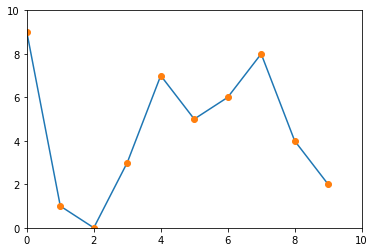

In [ ]:
import matplotlib.pyplot as plt #Importing the mathplot library as plt
plt.plot(best_route) # plotting the graph for best route 
plt.plot(best_route, 'o')
plt.axis([0, 10, 0, 10]) # giving the start and end values for X and Y axis for the grapgh.
plt.show()